1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [1]:
!git clone https://github.com/kisejin/ML_Week03.git

Cloning into 'ML_Week03'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 19.95 KiB | 1.81 MiB/s, done.


In [2]:
import os
os.chdir('/content/ML_Week03/Tuan03/')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# from google.colab import drive

# drive.mount("/content/drive")

In [4]:
import pandas as pd
PATH = "TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


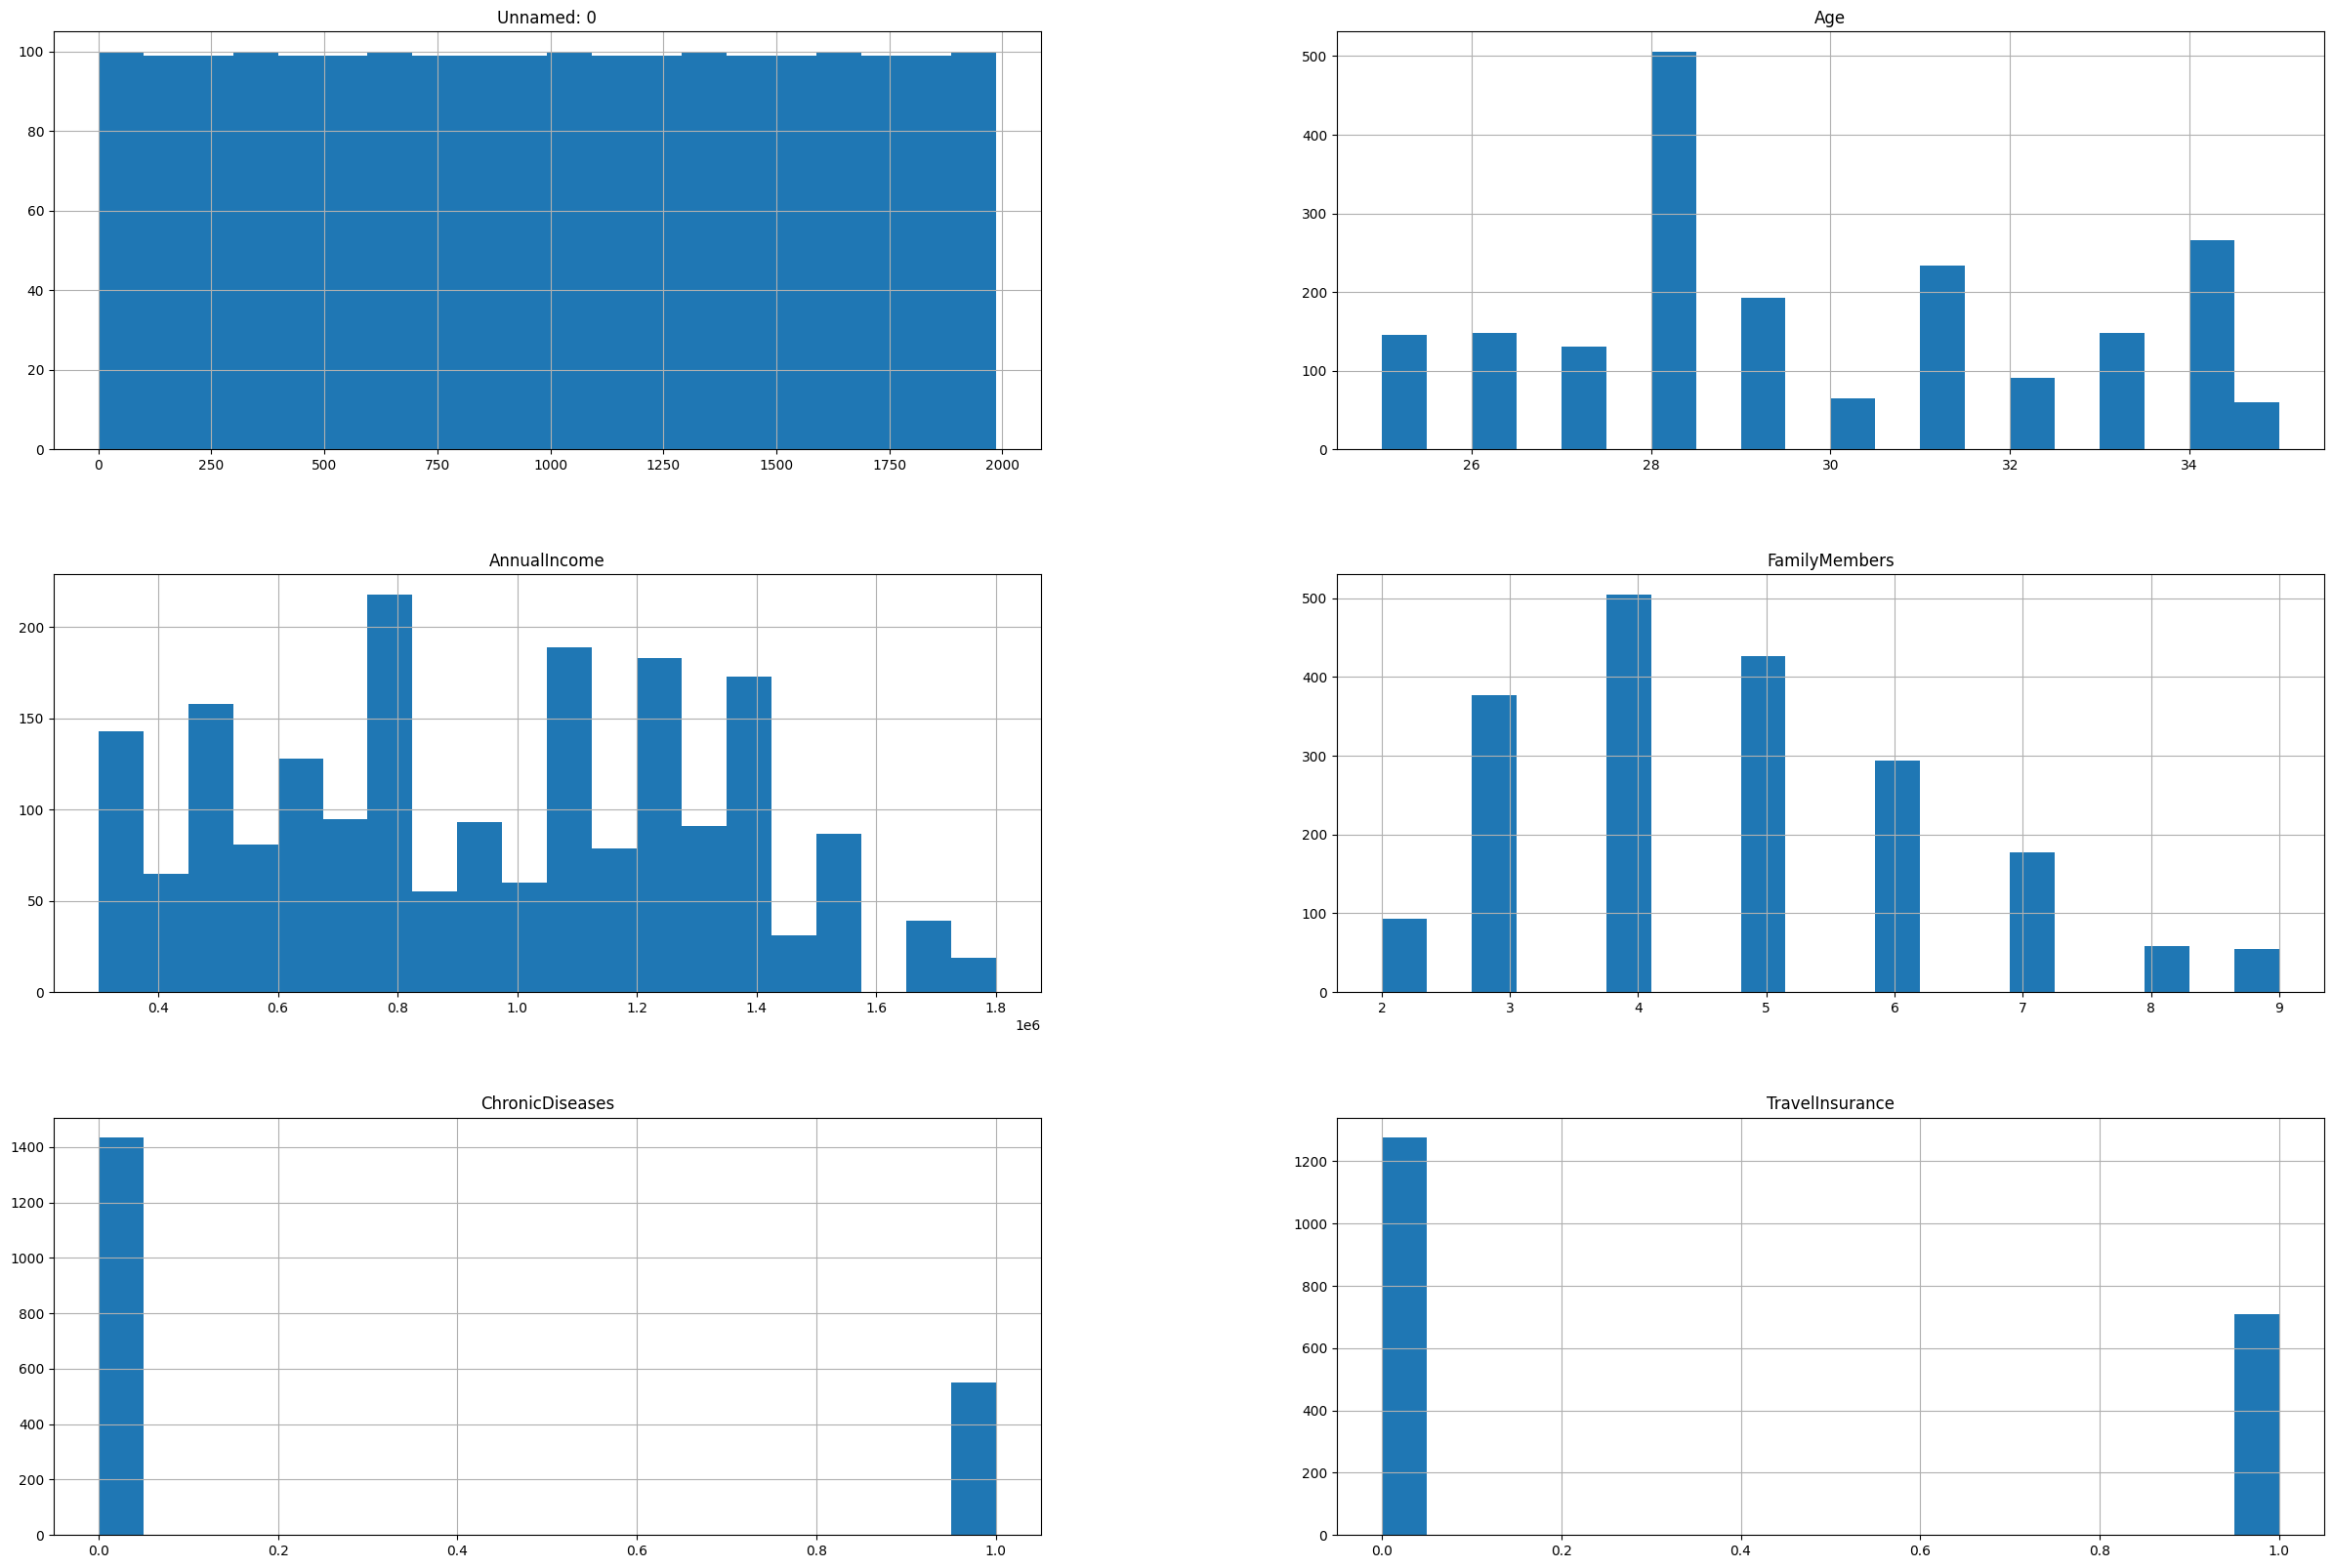

In [ ]:
# Show histogram
df.hist(bins=20,figsize=(30,20))
plt.show()

## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here
# Check type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
# Collect numeric columns and categorical columns
print("Continous Columns")
numerical_cols = df.describe().columns[1:]
print(numerical_cols)
display(df.describe())

print("Categorical Columns")
categorical_cols = df.describe(include=[object]).columns
print(categorical_cols)
display(df.describe(include=['object']))

Continous Columns
Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object')


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Categorical Columns
Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


Unique values in categorical column

In [ ]:
for col in categorical_cols:
  print(f'Column {col}: \n {df[col].unique()}')

Column Employment Type: 
 ['Government Sector' 'Private Sector/Self Employed']
Column GraduateOrNot: 
 ['Yes' 'No']
Column FrequentFlyer: 
 ['No' 'Yes']
Column EverTravelledAbroad: 
 ['No' 'Yes']


In [ ]:
for col in categorical_cols:
  print(f'Column {col}: \n {df[col].value_counts()} \n')

Column Employment Type: 
 Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64 

Column GraduateOrNot: 
 Yes    1692
No      295
Name: GraduateOrNot, dtype: int64 

Column FrequentFlyer: 
 No     1570
Yes     417
Name: FrequentFlyer, dtype: int64 

Column EverTravelledAbroad: 
 No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64 



Check null/nan value in dataframe

In [ ]:
df[numerical_cols].isna().sum()

Age                0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
TravelInsurance    0
dtype: int64

In [ ]:
df[categorical_cols].isna().sum()

Employment Type        0
GraduateOrNot          0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

**Nhận xét**
* Với dữ liệu kiểu int/float và kiểu object không xuất hiện giá trị null/nan

### Data Visualization

Quan sát miền phân bố của dữ liệu

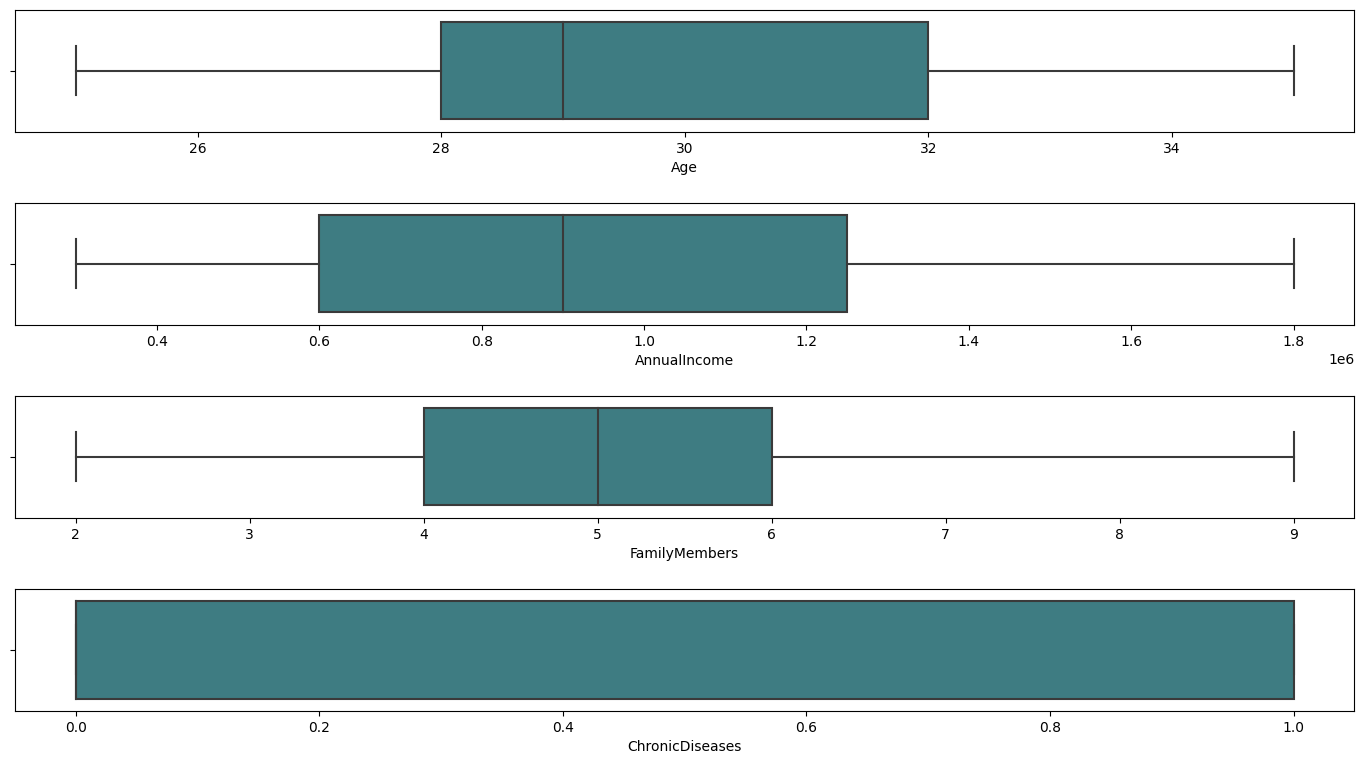

In [ ]:
box_cols = numerical_cols[:-1]
fig, axes=plt.subplots(len(box_cols), 1, figsize=(14, 2*len(box_cols)),sharex=False,sharey=False)

for i, column in enumerate(box_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

* Dựa vào đồ thị boxplot các cột dữ liệu không xuất hiện outliers
* Đồ thị boxplot của ChronicDiseases không hiển thị như kì vọng, cần kiểm tra giá trị của đặc trưng này

In [ ]:
df['ChronicDiseases'].unique()

array([1, 0])

Với đặc trưng ChronicDiseases chỉ xuất hiện 2 giá trị, ta cần thêm cột này vào cột categorical và loại khỏi numerical

In [6]:
categorical_cols = list(categorical_cols)
categorical_cols.append('ChronicDiseases')

numerical_cols = list(numerical_cols)
numerical_cols = [x for x in numerical_cols if x not in ('ChronicDiseases', 'TravelInsurance')]


Barplot quan sát số lượng các giá trị categorical

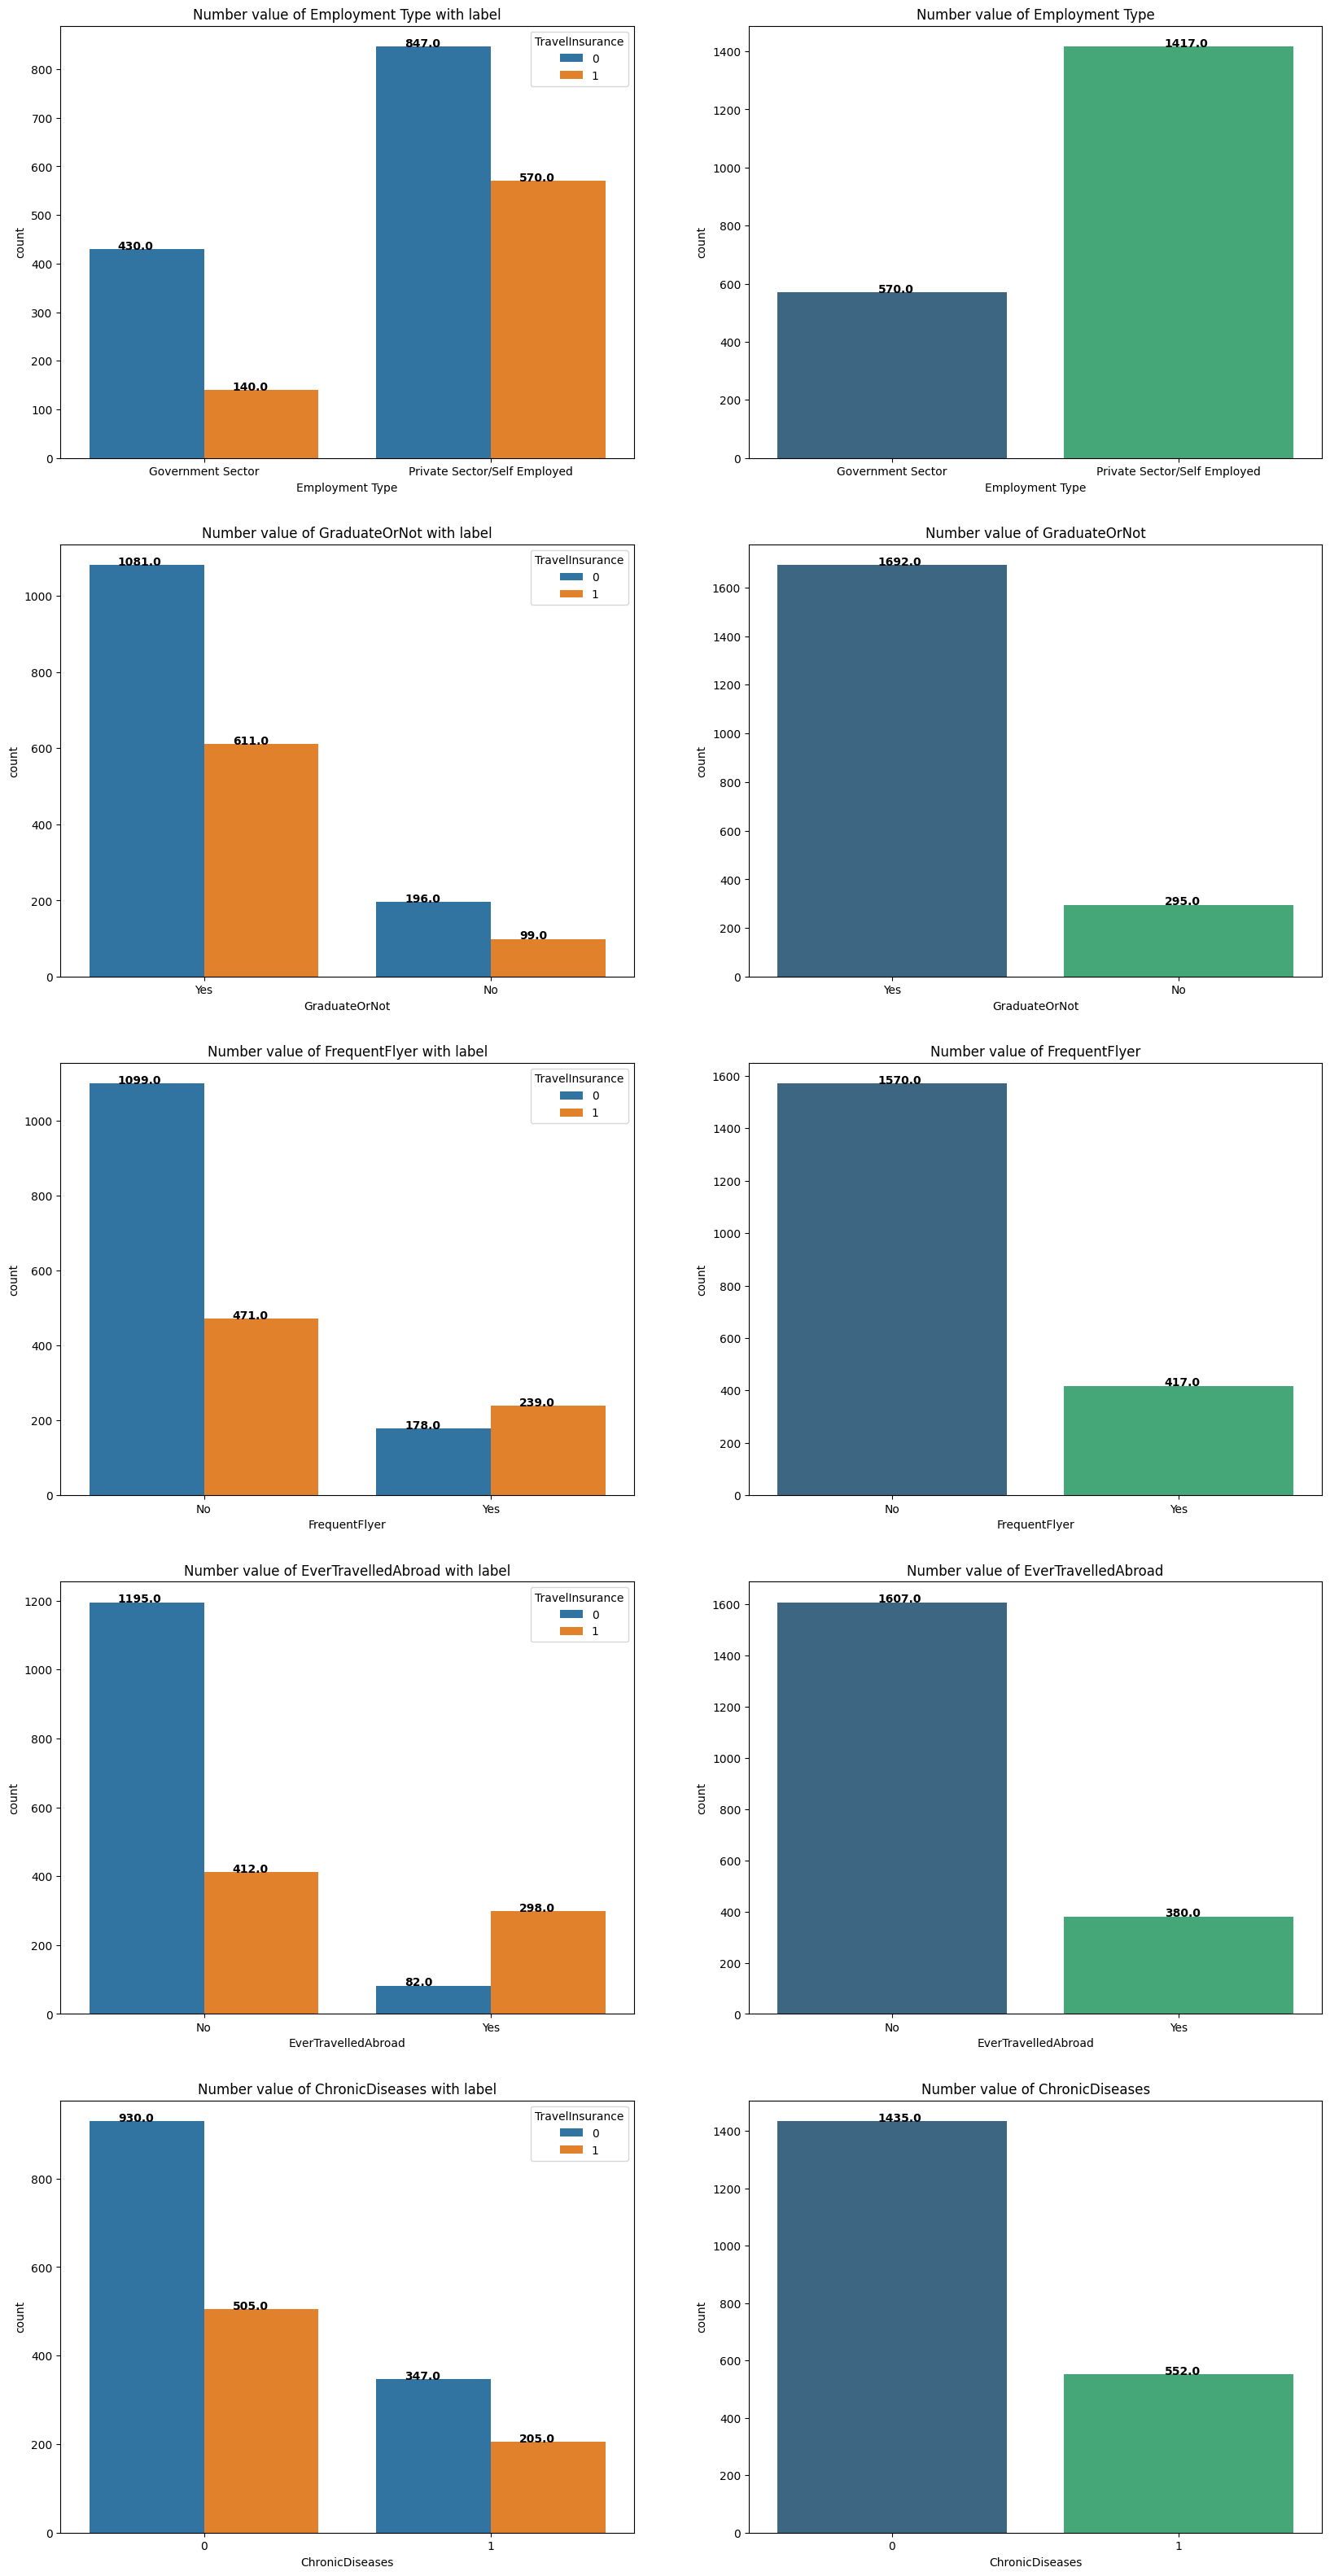

In [ ]:
_, ax = plt.subplots(5,2, figsize=(20,40))
ax = ax.ravel()
k = 0
for i,col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, hue='TravelInsurance', ax = ax[i+k])
    sns.countplot(x=col, data=df, ax = ax[i+k+1], palette='viridis')
    ax[i+k].set_title('Number value of {} with label'.format(col))
    ax[i+k+1].set_title('Number value of {}'.format(col))
    
    for j in ax[i+k].patches:
        ax[i+k].text(j.get_x()+0.1, j.get_height()+0.1, str(round((j.get_height()), 2)),fontweight='bold', fontsize=10, color='black')
    for l in ax[i+k+1].patches: 
        ax[i+k+1].text(l.get_x()+0.35, l.get_height()+0.1, str(round((l.get_height()), 2)),fontweight='bold', fontsize=10, color='black')

    k += 1

* Thống kê label của dữ liệu

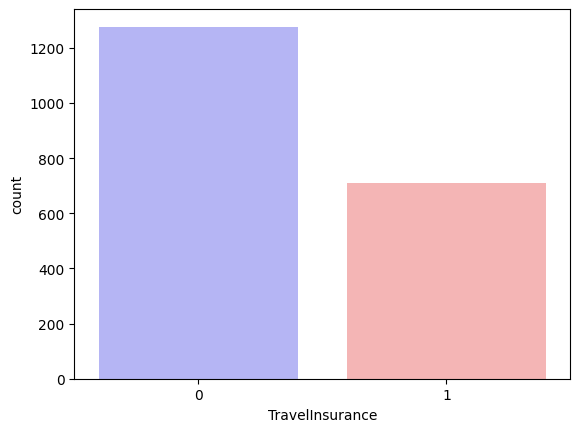

In [ ]:

sns.countplot(x = 'TravelInsurance', data = df, palette = 'bwr')
plt.show()

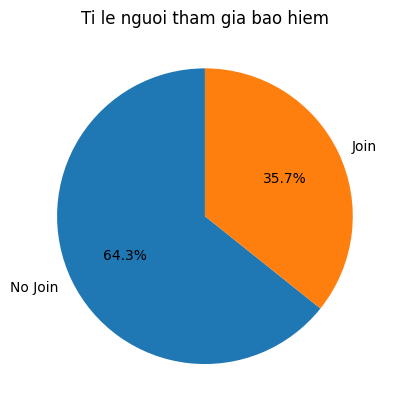

In [ ]:
plt.pie(df['TravelInsurance'].value_counts(), labels = ['No Join', 'Join'], autopct='%1.1f%%', startangle=90)
plt.title('Ti le nguoi tham gia bao hiem')
plt.show()

Với dữ liệu trên không có ý nghĩa khi hiển thị 

In [ ]:
# def scatter_plot(x='Age' , y = 'AnnualIncome', z = 'TravelInsurance'):
#     """Vẽ biểu đồ phân tán với cặp đặc trưng khác nhau
#     """
#     if x == y:
#         raise ValueError("Can't draw the same features together")
#     plt.figure(figsize=(13,10))
#     sns.scatterplot(x=df[x], y=df[y], hue=df[z], linewidth=0.1)
#     plt.title('Scatter Plot 2D')
#     plt.show()

# widgets.interact(scatter_plot, x = numerical_cols, 
#                                 y = numerical_cols, 
#                                 z = categorical_cols + ['TravelInsurance'])

Text(0.5, 1.0, 'Total Annual Income for each age')

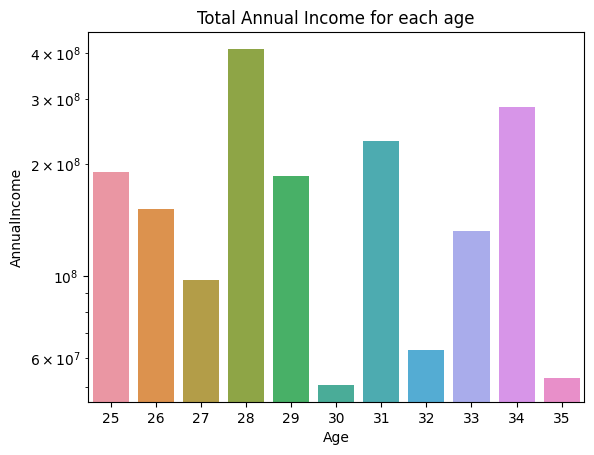

In [ ]:
df_temp = df.groupby('Age')['AnnualIncome'].sum().reset_index()
sns.barplot(data=df_temp, x = 'Age', y = 'AnnualIncome')
plt.yscale('log')
plt.title('Total Annual Income for each age')

**Nhận xét**:
* Dữ liệu cho thấy ở độ tuổi 28 và 34 thì tổng thu nhập hằng năm so với nhóm còn lại
* Với độ tuổi 30, 32, 35 gần như thấp hơn hẳn các nhóm khác.

Text(0.5, 1.0, 'Total Annual Income for each family')

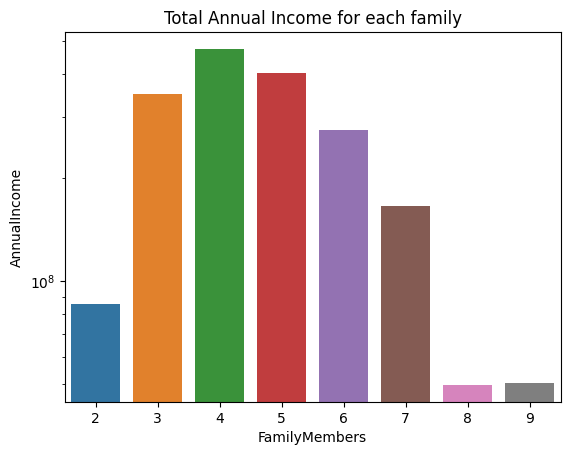

In [ ]:
df_temp = df.groupby('FamilyMembers')['AnnualIncome'].sum().reset_index()
sns.barplot(data=df_temp, x = 'FamilyMembers', y = 'AnnualIncome')
plt.yscale('log')
plt.title('Total Annual Income for each family')

**Nhận xét**:
* Các gia đình có thành viên từ 3, 4, 5, 6 có thu nhập cao.
* Gia đình có từ 8, 9 thành viên thì thu nhập eo hẹp hơn.

Biểu đồ correlation giữa các đặc trưng numerical

<ipython-input-19-eb43f895e3e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,1:].corr(),annot=True)


<Axes: >

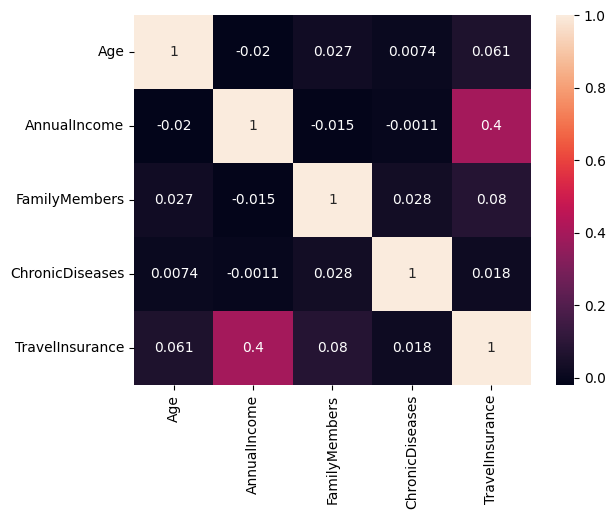

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(),annot=True)

## Preprocessing

In [7]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    # Drop unecessary column
    df = df.drop('Unnamed: 0', axis = 1)
    for col in list(categorical_cols) + ['TravelInsurance']:
      df[col] = df[col].astype("category")
    return df

In [8]:
df = preprocessing_data(df.copy())

In [9]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

Các bước feature engineering sẽ được thiết lập trong pipeline khi train model. Mục đích để các normalizer học thiết lập trong tập train và dùng chúng để transform cho tập test

In [ ]:
# # Heatmap
# import seaborn as sns

# def apply_feature_engineering(df):
#     """
#     Apply all feature engineering to transform your data into number
#     :param df: pandas DataFrame
#     :return: pandas DataFrame
#     """
#     # Todo: Normalize your data
#     df =
#     return df

# df = apply_feature_engineering(df)
# sns.heatmap(df.corr()) # Show heatmap after normalized data

In [10]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    return X, y

X, y = prepare_X_y(df.copy())

# Apply machine learning model

## Train-test split

In [47]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2023
TRAIN_SIZE = 0.85

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [48]:
print('Shape of train set: ' ,trainX.shape)
print('Shape of test set: ', testX.shape)

Shape of train set:  (1688, 8)
Shape of test set:  (299, 8)


## Build SK-learn model

In [14]:
from sklearn.utils.metaestimators import BaseEstimator
from sklearn.metrics import classification_report,\
                            f1_score, \
                            accuracy_score,\
                            recall_score,\
                            precision_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,\
                                  MinMaxScaler, StandardScaler

from sklearn.naive_bayes import GaussianNB, MultinomialNB,\
                                ComplementNB, BernoulliNB,\
                                CategoricalNB

import time


class LabelEncoders(BaseEstimator):
    def __init__(self):
      self.encoder = list()
    
    def fit(self, X, y=None):
      for i in range(X.shape[1]):
        encoder = LabelEncoder()
        encoder.fit(X[X.columns[i]])
        self.encoder.append(encoder)
      return self
    
    def transform(self, X):
      X_new = X.copy()
      for i in range(X.shape[1]):
        X_new[X_new.columns[i]] = (self.encoder)[i].transform(X[X.columns[i]])
      return X_new



def build_model(X, y,model_ori):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :param model_ori: model from user
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    start_time = time.time()
    col_trans = ColumnTransformer(
        transformers= [
            ('norm_categorical', LabelEncoders(),categorical_cols),
            ('norm_numerical', MinMaxScaler(), numerical_cols)
        ],
        remainder="passthrough"
    )
    model = make_pipeline(col_trans, model_ori)
    # Todo: fit your model with X, y
    model.fit(X,y)
    end_time = time.time() - start_time
    return model, end_time

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision: ", precision_score(y_true=y_true, y_pred=y_pred))
    print("recall: ", recall_score(y_true=y_true, y_pred=y_pred))
    print("accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred))
    print("F1: ", f1_score(y_true=y_true, y_pred=y_pred))
    print("Classification report: \n", classification_report(y_true=y_true, y_pred=y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_true=y_true, y_pred=y_pred))
    # Todo: Only choose one of them as your score for the question 7
    main_score = precision_score(y_true=y_true, y_pred=y_pred)
    return main_score



### Gaussian Naive Bayes

Gaussian NB classifier phù hợp với bài toán xuất hiện đặc trưng numerical được cho bởi công thức:
$$P(x_i|y) = \frac{1}{\sqrt{2\pi \sigma^2_y}}exp(-\frac{(x_i-\mu_i)^2}{2\sigma^2_y})$$

In [49]:
# GaussianNB 

model_ori = GaussianNB(var_smoothing=1e-9)
model1,endtime = build_model(trainX, trainY, model_ori)
# Compare on training dataset
print('Time to train: ', endtime)
pred = model1.predict(trainX)
print('Training performance: ')
print('Main score: ', calculate_performance(trainY, pred))
print('')
pred = model1.predict(testX)
print('Testing performance: ')
print('Main score: ', calculate_performance(testY, pred))


Time to train:  0.029586076736450195
Training performance: 
precision:  0.6899563318777293
recall:  0.5188834154351396
accuracy:  0.7422985781990521
F1:  0.5923149015932522
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1079
           1       0.69      0.52      0.59       609

    accuracy                           0.74      1688
   macro avg       0.73      0.69      0.70      1688
weighted avg       0.74      0.74      0.73      1688

Confusion matrix: 
 [[937 142]
 [293 316]]
Main score:  0.6899563318777293

Testing performance: 
precision:  0.717948717948718
recall:  0.5544554455445545
accuracy:  0.7759197324414716
F1:  0.6256983240223464
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       198
           1       0.72      0.55      0.63       101

    accuracy                           0.78       299
   macro avg       0.7

### Multinominal Naive Bayes

Multinomial NB classifier phù hợp với bài toán có đặc trưng rời rạc nhiều chiều
$$\hat\theta_{y_i} = \frac{N_{y_i}+\alpha}{N_y + alpha*n}$$
với $\hat\theta_{y_i}$ là ước lượng smoothed hợp lí cực đại liên quan đến việc tần xuất hiện của giá trị trong 1 đặc trưng. $N_{y_i} = \sum_{x \in T}x_i$ là số lần đặc trưng i xuất hiện trong lớp $y$ trong dataset $T$. $N_{y} = \sum_{i=1}^{n}N_{y_i}$ là tổng số các đặc trưng của lớp y

In [50]:
model_ori = MultinomialNB(alpha=1.0, force_alpha='warn', fit_prior=True, class_prior=None)
model2,endtime = build_model(trainX, trainY, model_ori)
# Compare on training dataset
print('Time to train: ', endtime)
pred = model2.predict(trainX)
print('Training performance: ')
print('Main score: ', calculate_performance(trainY, pred))
print('')
pred = model2.predict(testX)
print('Testing performance: ')
print('Main score: ', calculate_performance(testY, pred))

Time to train:  0.019456148147583008
Training performance: 
precision:  0.7857142857142857
recall:  0.43349753694581283
accuracy:  0.7529620853080569
F1:  0.5587301587301587
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.93      0.83      1079
           1       0.79      0.43      0.56       609

    accuracy                           0.75      1688
   macro avg       0.77      0.68      0.69      1688
weighted avg       0.76      0.75      0.73      1688

Confusion matrix: 
 [[1007   72]
 [ 345  264]]
Main score:  0.7857142857142857

Testing performance: 
precision:  0.7818181818181819
recall:  0.42574257425742573
accuracy:  0.7658862876254181
F1:  0.5512820512820512
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       198
           1       0.78      0.43      0.55       101

    accuracy                           0.77       299
   macro avg   

### Complement Naive Bayes

Complement NB là biến thể của multinomial NB phù hợp với bài toán mất cân bằng lớp $y$:
$$\hat\theta_{ci} = \frac{\alpha_i + \sum_{j:y_i\neq c}d_{ij}}{\alpha + \sum_{j:y_i\neq c}\sum_{k}d_{kj}}$$
$$w_{ci} = log\hat\theta_{ci}$$
$$w_{ci} = \frac{w_{ci}}{\sum_{j}|w_{cj}|}$$

In [51]:
model_ori = ComplementNB(alpha=1.0, force_alpha='warn', fit_prior=True, class_prior=None)
model3,endtime = build_model(trainX, trainY, model_ori)
# Compare on training dataset
print('Time to train: ', endtime)
pred = model3.predict(trainX)
print('Training performance: ')
print('Main score: ', calculate_performance(trainY, pred))
print('')
pred = model3.predict(testX)
print('Testing performance: ')
print('Main score: ', calculate_performance(testY, pred))

Time to train:  0.02946019172668457
Training performance: 
precision:  0.629126213592233
recall:  0.5320197044334976
accuracy:  0.7180094786729858
F1:  0.5765124555160143
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1079
           1       0.63      0.53      0.58       609

    accuracy                           0.72      1688
   macro avg       0.69      0.68      0.68      1688
weighted avg       0.71      0.72      0.71      1688

Confusion matrix: 
 [[888 191]
 [285 324]]
Main score:  0.629126213592233

Testing performance: 
precision:  0.631578947368421
recall:  0.594059405940594
accuracy:  0.745819397993311
F1:  0.6122448979591837
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       198
           1       0.63      0.59      0.61       101

    accuracy                           0.75       299
   macro avg       0.72    

### Bernoulli Naive Bayes

Mô hình hoạt động hiệu quả với các biến đặc trưng là binary hoặc boolean như công thức sau:
$$P(x_i|y) = P(x_i = 1|y)x_i + (1-P(x_i=1|y))(1-x_i)$$

In [52]:
def build_model2(X, y,model_ori):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :param model_ori: model from user
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    col_trans = ColumnTransformer(
        transformers= [
            ('norm_categorical', OneHotEncoder(),categorical_cols),
            ('norm_numerical', MinMaxScaler(), numerical_cols)
        ],
        remainder="passthrough"
    )
    model = make_pipeline(col_trans, model_ori)
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

model_ori = BernoulliNB(alpha=1.0, force_alpha=True,binarize=0.0, fit_prior=True, class_prior=None)
model4,endtime = build_model(trainX, trainY, model_ori)
# Compare on training dataset
print('Time to train: ', endtime)
pred = model4.predict(trainX)
print('Training performance: ')
print('Main score: ', calculate_performance(trainY, pred))
print('')
pred = model4.predict(testX)
print('Testing performance: ')
print('Main score: ', calculate_performance(testY, pred))

Time to train:  0.018118858337402344
Training performance: 
precision:  0.7174447174447175
recall:  0.4794745484400657
accuracy:  0.7440758293838863
F1:  0.5748031496062993
Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.89      0.82      1079
           1       0.72      0.48      0.57       609

    accuracy                           0.74      1688
   macro avg       0.73      0.69      0.70      1688
weighted avg       0.74      0.74      0.73      1688

Confusion matrix: 
 [[964 115]
 [317 292]]
Main score:  0.7174447174447175

Testing performance: 
precision:  0.746268656716418
recall:  0.49504950495049505
accuracy:  0.7725752508361204
F1:  0.5952380952380953
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       198
           1       0.75      0.50      0.60       101

    accuracy                           0.77       299
   macro avg       0.

### Categorical Naive Bayes

Categorical NB thực hiện cho bài toán dữ liệu rời rạc. Với xác suất giá trị $t$ trong đặc trưng $i$ bởi class $c$ được ước lượng là:
$$P(x_i=t|y=c;\alpha) = \frac{N_{tic} + \alpha}{N_c + \alpha n_i}$$


In [53]:
model_ori = CategoricalNB(alpha=1.0, force_alpha=True, fit_prior=True, 
                          class_prior=None, min_categories=None)
model4,endtime = build_model(trainX, trainY, model_ori)
# Compare on training dataset
print('Time to train: ', endtime)
pred = model4.predict(trainX)
print('Training performance: ')
print('Main score: ', calculate_performance(trainY, pred))
print('')
pred = model4.predict(testX)
print('Testing performance: ')
print('Main score: ', calculate_performance(testY, pred))

Time to train:  0.02121567726135254
Training performance: 
precision:  0.7377049180327869
recall:  0.4433497536945813
accuracy:  0.7422985781990521
F1:  0.5538461538461539
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.91      0.82      1079
           1       0.74      0.44      0.55       609

    accuracy                           0.74      1688
   macro avg       0.74      0.68      0.69      1688
weighted avg       0.74      0.74      0.72      1688

Confusion matrix: 
 [[983  96]
 [339 270]]
Main score:  0.7377049180327869

Testing performance: 
precision:  0.7796610169491526
recall:  0.45544554455445546
accuracy:  0.7725752508361204
F1:  0.5750000000000001
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       198
           1       0.78      0.46      0.58       101

    accuracy                           0.77       299
   macro avg       0.

### Mixed Naive Bayes

In [ ]:
# !pip install git+https://github.com/remykarem/mixed-naive-bayes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/remykarem/mixed-naive-bayes to /tmp/pip-req-build-gpb4fxqx
  Running command git clone --filter=blob:none --quiet https://github.com/remykarem/mixed-naive-bayes /tmp/pip-req-build-gpb4fxqx
  Resolved https://github.com/remykarem/mixed-naive-bayes to commit 6d90de8adf75dbef032ad51029ad3782190ec577
  Preparing metadata (setup.py) ... done
  Created wheel for mixed-naive-bayes: filename=mixed_naive_bayes-0.0.4-py3-none-any.whl size=10881 sha256=57790ba09a8011440632942f8dab089ad787a93789e90cd822a45142218859b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-q3_bpu26/wheels/16/0d/9f/929c7af51d4b12da89d0ac3c6ce4f4981214fee69d9440028e
Successfully built mixed-naive-bayes


In [54]:
from mixed_naive_bayes import MixedNB
index_cat = [i for i in range(len(df.columns)) if df.columns[i] in categorical_cols]
model_ori = MixedNB(categorical_features=index_cat, max_categories=None,
                 alpha=1, priors=None, var_smoothing=1e-9)
model = build_model2(trainX, trainY, model_ori)
model6,endtime = build_model(trainX, trainY, model_ori)
# Compare on training dataset
print('Time to train: ', endtime)
pred = model6.predict(trainX)
print('Training performance: ')
print('Main score: ', calculate_performance(trainY, pred))
print('')
pred = model6.predict(testX)
print('Testing performance: ')
print('Main score: ', calculate_performance(testY, pred))

Time to train:  0.013413190841674805
Training performance: 
precision:  0.7854984894259819
recall:  0.4269293924466338
accuracy:  0.7511848341232228
F1:  0.553191489361702
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.93      0.83      1079
           1       0.79      0.43      0.55       609

    accuracy                           0.75      1688
   macro avg       0.76      0.68      0.69      1688
weighted avg       0.76      0.75      0.73      1688

Confusion matrix: 
 [[1008   71]
 [ 349  260]]
Main score:  0.7854984894259819

Testing performance: 
precision:  0.7924528301886793
recall:  0.4158415841584158
accuracy:  0.7658862876254181
F1:  0.5454545454545455
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       198
           1       0.79      0.42      0.55       101

    accuracy                           0.77       299
   macro avg      

/content/ML_Week03/Tuan03/mixed_naive_bayes.py:428: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
/content/ML_Week03/Tuan03/mixed_naive_bayes.py:432: UserWarning: Feature no. 5 is continuous data. Casting data to integer.
  warnings.warn(f"Feature no. {feature_no} is continuous data. " +
/content/ML_Week03/Tuan03/mixed_naive_bayes.py:432: UserWarning: Feature no. 6 is continuous data. Casting data to integer.
  warnings.warn(f"Feature no. {feature_no} is continuous data. " +
/content/ML_Week03/Tuan03/mixed_naive_bayes.py:432: UserWarning: Feature no. 7 is continuous data. Casting data to integer.
  warnings.warn(f"Feature no. {feature_no} is continuous data. " +
/content/ML_Week03/Tuan03/mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_features ==

* Với gaussian NB không bị bias cho trường hợp đặc trưng numerical hay categorical
* Ngược lại, bản chất các model: CategoricalNB, BernoulliNB, ComplementNB, MultinomialNB xử lí tốt đối với mẫu toàn đặc trưng rời rạc
> Model áp dụng (option):
  1. Sử dụng Gaussian
  2. Dùng MixedNB
  3. Apply dữ liệu liên tục cho Gaussian và rời rạc cho một trong các model xử lí rời rạc và tổng hợp xác suất 2 model này lại

## Decision Boundary

In [ ]:
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

def decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02
    
    # Tao grid point tren plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Ve decision boundary dua tren du doan cua model
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    # Ve decision boundary
    ax.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")

def plot_scatter(X, y, title, ax, model=None, predict_plot = False):
    draw_data = X.copy()
    col_trans = ColumnTransformer(
        transformers= [
            ('norm_categorical', LabelEncoders(),categorical_cols),
            # ('norm_numerical', MinMaxScaler(), numerical_cols)
        ],
        remainder="passthrough"
    )
    scaler = MinMaxScaler()
    reducer = PCA(n_components=2, 
                  copy=True, whiten=False, 
                  svd_solver='auto', tol=0.0, iterated_power='auto', 
                  n_oversamples=10, power_iteration_normalizer='LU', random_state=42)
    pipeline = make_pipeline(col_trans,scaler, reducer)
    draw_data = pipeline.fit_transform(draw_data)
    if predict_plot == True:
        if model is None:
          model = GaussianNB(var_smoothing=1e-9)
        model.fit(draw_data,y)
        
        decision_boundary(model, draw_data, y, ax)
        title = title + f'with score: {f1_score(y, model.predict(draw_data)):.3f}'
    else:
        colors = {1: 'red', 0: 'blue'}
        scatter = ax.scatter(draw_data[:,0], draw_data[:,1], c = y)
        legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
    ax.set_title(title, fontsize=16)

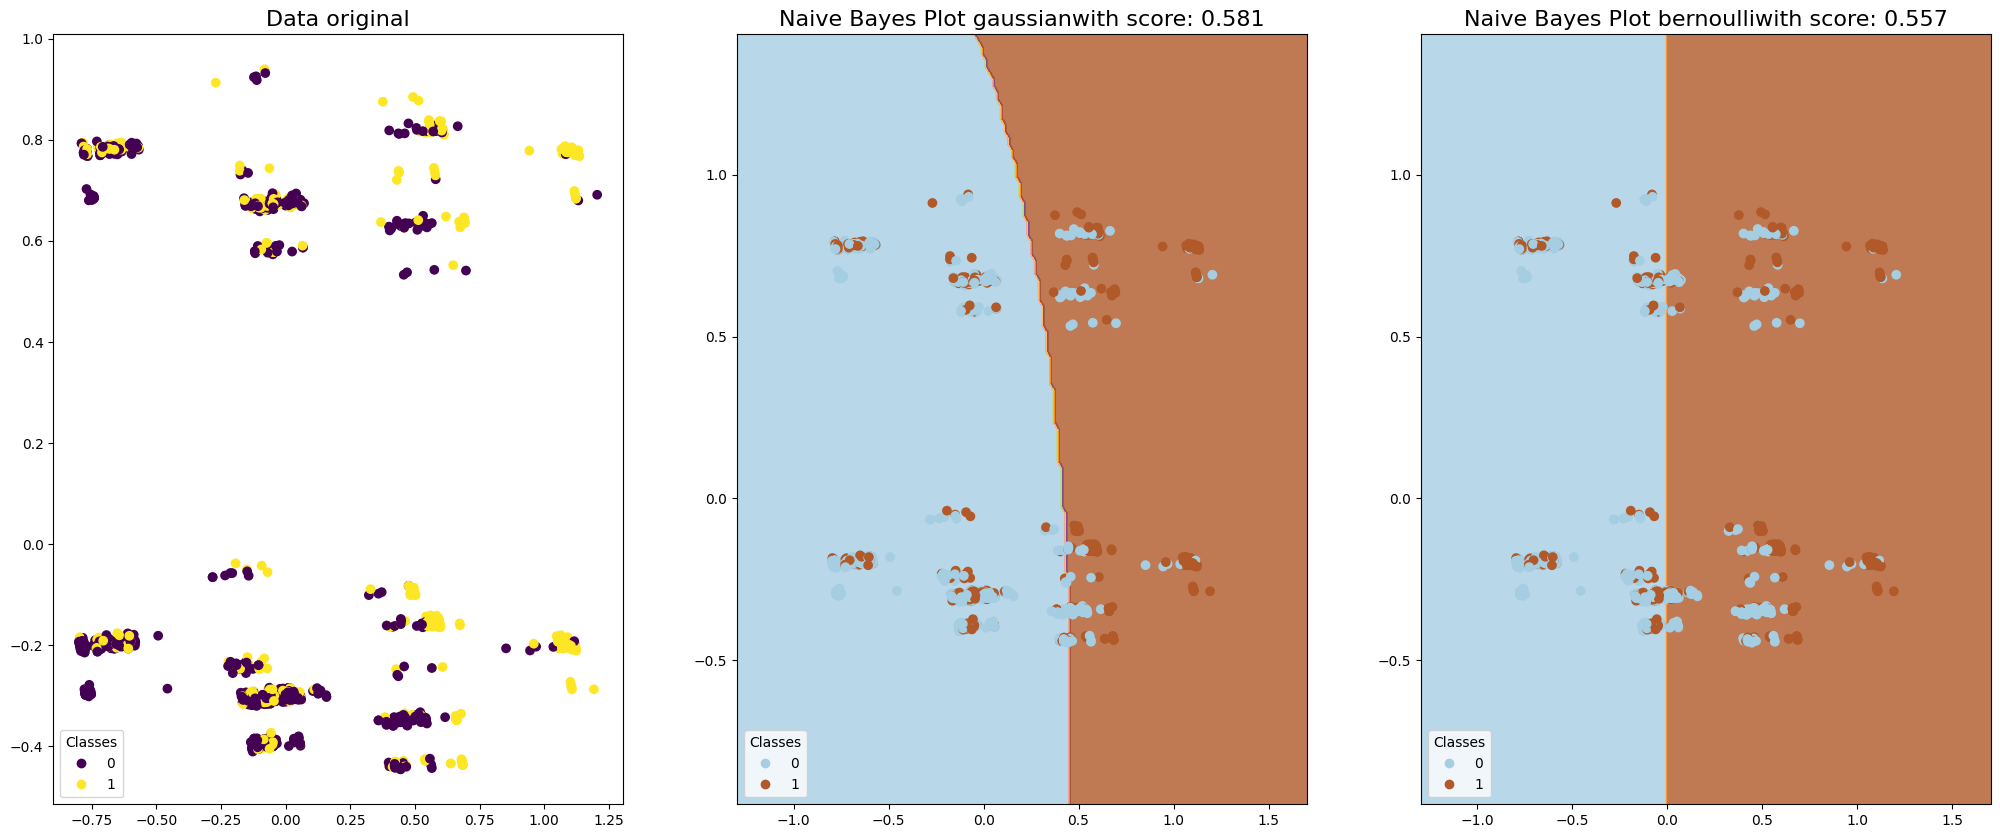

In [ ]:
models = {
    'gaussian': GaussianNB(var_smoothing=1e-9),
    'bernoulli': BernoulliNB(alpha=1.0, force_alpha=True,binarize=0.0, fit_prior=True, class_prior=None),
}
fig, ax = plt.subplots(1,3,figsize=(25,10))
ax = ax.ravel()
# Scatter plot dữ liệu ban đầu giảm còn 2 chiều đặc trưng 
plot_scatter(trainX, trainY, 'Data original' ,ax[0], predict_plot = False, model=None)

# Scatter plot cho model 
for i, name in enumerate(models):

  plot_scatter(trainX, trainY, f'Naive Bayes Plot {name}' ,ax[i+1], predict_plot = True, model=models[name])


## Fine-tuning model 

Tạo lớp Model chứa 2 phương thức:


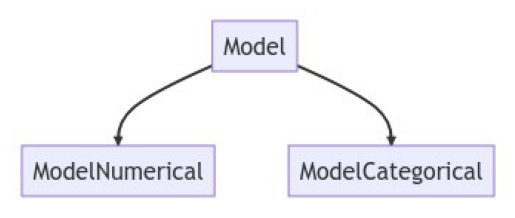

In [ ]:
import base64
import requests, io
from PIL import Image
import matplotlib.pyplot as plt

graph = """
graph TD;
    Model-->ModelNumerical;
    Model-->ModelCategorical;
    Model-->ModelMixed;
"""

graphbytes = graph.encode("ascii")
base64_bytes = base64.b64encode(graphbytes)
base64_string = base64_bytes.decode("ascii")
img = Image.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
plt.imshow(img)
plt.axis('off')
plt.show();

Lớp Model sẽ lưu lại các thông tin cần thiết từ bộ dữ liệu, đồng thời khởi tạo một số giá trị cần thiết. Phương thức cho những lớp con kế thừa từ lớp Model luôn có phương thức fit, so sánh các kết quả khi tìm gridsearch, score của best model

### Base Class Model

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

class Model():
  def __init__(self, name, cat_cols, con_cols, cols) -> None:
        self.cat_cols = cat_cols
        self.idx_cat = [i for i in range(len(cols)) if cols[i] in self.cat_cols]
        self.con_cols = con_cols
        self.model = None
        self.params = None
        self.grid = None
        self.name = name

    # Fit pipeline model: feature engeering -> model
  def fit(self, X, y, pipeline_gdsearch):
        if isinstance(self.params[self.name], list):
            params_grid = []
            for dic in self.params[self.name]:
                param = {}
                for key, value in dic.items():
                    param['estimator__%s' % key] = value
                params_grid.append(param)
        else:
            params_grid = {}
            for param, value in self.params[self.name].items():
                params_grid['estimator__%s' % param] = value
        self.grid = GridSearchCV(pipeline_gdsearch, params_grid, cv=10, 
                                 scoring='precision', 
                                 n_jobs=-1, return_train_score=True,)
        self.grid.fit(X, y)
    
    # Hiển thị thống kê tham số tối ưu
  def stat_compare_hyperparams(self):
        if self.grid is None:
            raise ValueError("You must fit the model first")
        results_df = pd.DataFrame(self.grid.cv_results_)
        results_df = results_df.sort_values(by=['rank_test_score'])
        results_df = results_df.set_index(
            results_df['params'].apply(lambda x: ', '.join(
                str(value) for value in x.values()
            )).rename_axis(', '.join(str(key).replace('estimator__', '') for key in results_df.loc[0, 'params']))
        )
        return results_df[['rank_test_score', 'mean_test_score', 'std_test_score']]
    
    # Tính score cho model
  def precision_score(self, X, y):
        return self.grid.score(X, y)





### Derived Class Model Numerical

Kế thừa từ lớp Model, Model Numerical với ngụ ý xử lí bài toán với dữ liệu có đặc trưng dạng numerical

In [42]:
class ModelNumerical(Model):
    def __init__(self, name, cat_cols, con_cols, cols) -> None:
        super().__init__(name, cat_cols, con_cols, cols)

        self.model = {
            'gaussian': GaussianNB(var_smoothing=1e-9)
        }
        
        self.params = {
              'gaussian' : {
                  'var_smoothing': 10**np.arange(-9,1).astype(float)
              }   
        }


    # Fit pipeline model: feature engeering -> model
    def fit(self, X, y):
        col_trans = ColumnTransformer(
          transformers= [
              ('norm_categorical', LabelEncoders(),self.cat_cols),
              ('norm_numerical', MinMaxScaler(), self.con_cols)
          ],
          remainder="passthrough"
        )
        pipeline_gdsearch = Pipeline(
            steps=[
                ('normalizer', col_trans),
                # ('scaler', MinMaxScaler((0,1))),
                ('estimator', self.model[self.name])
            ]
        )
        if isinstance(self.params[self.name], list):
            params_grid = []
            for dic in self.params[self.name]:
                param = {}
                for key, value in dic.items():
                    param['estimator__%s' % key] = value
                params_grid.append(param)
        else:
            params_grid = {}
            for param, value in self.params[self.name].items():
                params_grid['estimator__%s' % param] = value
        self.grid = GridSearchCV(pipeline_gdsearch, params_grid, cv=10, 
                                 scoring='precision', 
                                 n_jobs=-1, return_train_score=True)
        self.grid.fit(X, y)
    

Kết quả từ ModelNumerical

In [66]:
model1 = 'gaussian'

# Train model
results1 = ModelNumerical(model1, categorical_cols, numerical_cols, df.columns)
results1.fit(trainX, trainY)

In [67]:
score1 = results1.precision_score(testX, testY)
print(f'Model Gaussian score: {score1}')

Model Gaussian score: 0.8367346938775511


In [69]:
print(f'Model: {model1}: ')
display(results1.stat_compare_hyperparams().iloc[:5,:])
print('')

Model: gaussian: 


,rank_test_score,mean_test_score,std_test_score
params,,,
1.0,1,0.813312,0.070854
0.1,2,0.706677,0.062516
1e-09,3,0.690104,0.064896
1e-08,3,0.690104,0.064896
1e-07,3,0.690104,0.064896


In [70]:

display(results1.grid.best_estimator_)

Pipeline(steps=[('normalizer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('norm_categorical',
                                                  LabelEncoders(),
                                                  ['Employment Type',
                                                   'GraduateOrNot',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad',
                                                   'ChronicDiseases']),
                                                 ('norm_numerical',
                                                  MinMaxScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('estimator', GaussianNB(var_smoothing=1.0))])

### Derived Class Model Categorical
Cách bước dưới tham khảo bởi [stackoverflow](https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea/14255284#14255284)

In [34]:
from sklearn.preprocessing import KBinsDiscretizer

class ModelCategorical(Model):
    def __init__(self, name, cat_cols, con_cols, cols) -> None:
        super().__init__(name, cat_cols, con_cols, cols)
        self.model = {
            'multinomial': MultinomialNB(alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None),
            'complement': ComplementNB(alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None),
            'bernoulli': BernoulliNB(alpha=1.0, force_alpha=True,binarize=0.0, fit_prior=True, class_prior=None),
            'categorical': CategoricalNB(alpha=1.0, force_alpha=True, fit_prior=True, 
                          class_prior=None, min_categories=None) 
        }
        
        self.params = {
              'multinomial' : {
                  'alpha': np.logspace(-1, 1, 10),
              },
              'complement': {
                  'alpha': np.logspace(-1, 1, 10),
              },
              'bernoulli': {
                  'alpha': np.logspace(-1, 1, 10),
                  'binarize': np.arange(0,1.1,0.1),
              },
              'categorical': {
                  'alpha': np.logspace(-1, 1, 10),
                  
              }  
        }


    # Fit pipeline model: feature engeering -> model
    # Tren trang stackoverflow voi cac du lieu bien numerical thi moi bin chua 20% size training set 
    #   tuc ta se chia du lieu thanh 5 bins va moi bin bang nhau voi strategy = quantile
    def fit(self, X, y):
        col_trans = ColumnTransformer(
          transformers= [
              ('norm_categorical', LabelEncoders(),self.cat_cols),
              ('discrete_numerical', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state = 42), self.con_cols)
          ],
          remainder="passthrough"
        )
        pipeline_gdsearch = Pipeline(
            steps=[
                ('normalizer', col_trans),
                ('scaler', MinMaxScaler((0,1))),
                ('estimator', self.model[self.name])
            ]
        )
        if isinstance(self.params[self.name], list):
            params_grid = []
            for dic in self.params[self.name]:
                param = {}
                for key, value in dic.items():
                    param['estimator__%s' % key] = value
                params_grid.append(param)
        else:
            params_grid = {}
            for param, value in self.params[self.name].items():
                params_grid['estimator__%s' % param] = value
        self.grid = GridSearchCV(pipeline_gdsearch, params_grid, cv=10, 
                                 scoring='precision', 
                                 n_jobs=-1, return_train_score=True,)
        self.grid.fit(X, y)
    

Kết quả từ ModelCategorical

In [57]:
models2 = ['multinomial', 'complement', 'bernoulli','categorical']
results2 = {}

# Train model
for model in models2:
    results2[model] = ModelCategorical(model, categorical_cols, numerical_cols, df.columns)
    results2[model].fit(trainX, trainY)

In [58]:
score2 = []
for model in models2:
    score2.append(results2[model].precision_score(testX, testY))

df_score = pd.DataFrame({"Score":score2}, index=models2)
df_score

,Score
multinomial,0.781818
complement,0.625000
bernoulli,0.746479
categorical,0.746479


In [59]:
for model in models2: 
  print(f'Model: {model}: ')
  display(results2[model].stat_compare_hyperparams().iloc[:5,:])
  print('')

Model: multinomial: 


,rank_test_score,mean_test_score,std_test_score
params,,,
10.0,1,0.784100,0.057097
0.1,2,0.782513,0.058125
0.16681005372000587,2,0.782513,0.058125
0.2782559402207124,2,0.782513,0.058125
0.46415888336127786,2,0.782513,0.058125



Model: complement: 


,rank_test_score,mean_test_score,std_test_score
params,,,
5.994842503189409,1,0.623682,0.071992
3.593813663804626,2,0.622739,0.073411
10.0,3,0.622185,0.072710
0.1,4,0.618727,0.070002
0.16681005372000587,4,0.618727,0.070002



Model: bernoulli: 


,rank_test_score,mean_test_score,std_test_score
params,,,
"10.0, 0.9",1,0.743521,0.056818
"10.0, 0.8",1,0.743521,0.056818
"2.1544346900318834, 0.8",3,0.741975,0.057879
"5.994842503189409, 0.9",3,0.741975,0.057879
"5.994842503189409, 0.8",3,0.741975,0.057879



Model: categorical: 


,rank_test_score,mean_test_score,std_test_score
params,,,
10.0,1,0.743521,0.056818
2.1544346900318834,2,0.741975,0.057879
3.593813663804626,2,0.741975,0.057879
5.994842503189409,2,0.741975,0.057879
0.46415888336127786,5,0.738345,0.056471


In [60]:
for model in models2: 
    display(results2[model].grid.best_estimator_)

Pipeline(steps=[('normalizer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('norm_categorical',
                                                  LabelEncoders(),
                                                  ['Employment Type',
                                                   'GraduateOrNot',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad',
                                                   'ChronicDiseases']),
                                                 ('discrete_numerical',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   random_state=42),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('scaler', MinMaxScaler()),
                ('estimator', MultinomialNB(alpha=10.0, force_alpha=True))])

Pipeline(steps=[('normalizer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('norm_categorical',
                                                  LabelEncoders(),
                                                  ['Employment Type',
                                                   'GraduateOrNot',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad',
                                                   'ChronicDiseases']),
                                                 ('discrete_numerical',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   random_state=42),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('scaler', MinMaxScaler()),
                ('estimator',
                 ComplementNB(alpha=5.994842503189409, force_alpha=True))])

Pipeline(steps=[('normalizer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('norm_categorical',
                                                  LabelEncoders(),
                                                  ['Employment Type',
                                                   'GraduateOrNot',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad',
                                                   'ChronicDiseases']),
                                                 ('discrete_numerical',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   random_state=42),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('scaler', MinMaxScaler()),
                ('estimator',
                 BernoulliNB(alpha=10.0, binarize=0.8, force_alpha=True))])

Pipeline(steps=[('normalizer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('norm_categorical',
                                                  LabelEncoders(),
                                                  ['Employment Type',
                                                   'GraduateOrNot',
                                                   'FrequentFlyer',
                                                   'EverTravelledAbroad',
                                                   'ChronicDiseases']),
                                                 ('discrete_numerical',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   random_state=42),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('scaler', MinMaxScaler()),
                ('estimator', CategoricalNB(alpha=10.0, force_alpha=True))])

### Derived Class Model Mixed

In [73]:
class ModelMixed(Model):
    def __init__(self, name, cat_cols, con_cols, cols) -> None:
        super().__init__(name, cat_cols, con_cols, cols)

        self.model = {
            'mixed': MixedNB(categorical_features=self.idx_cat)
        }
        
        self.params = {
              'mixed': {
                  'var_smoothing': 10**np.arange(-9,1).astype(float),
                  'alpha': np.append(10**np.arange(-3,2).astype(float)*5, [10])
              }    
        }


    # Fit pipeline model: feature engeering -> model
    def fit(self, X, y):
        col_trans = ColumnTransformer(
          transformers= [
              ('norm_categorical', OneHotEncoder(),self.cat_cols),
              ('norm_numerical', MinMaxScaler(), self.con_cols)
          ],
          remainder="passthrough"
        )
        pipeline_gdsearch = Pipeline(
            steps=[
                ('normalizer', col_trans),
                # ('scaler', MinMaxScaler((0,1))),
                ('estimator', self.model[self.name])
            ]
        )
        if isinstance(self.params[self.name], list):
            params_grid = []
            for dic in self.params[self.name]:
                param = {}
                for key, value in dic.items():
                    param['estimator__%s' % key] = value
                params_grid.append(param)
        else:
            params_grid = {}
            for param, value in self.params[self.name].items():
                params_grid['estimator__%s' % param] = value
        self.grid = GridSearchCV(pipeline_gdsearch, params_grid, cv=10, 
                                 scoring='precision', 
                                 n_jobs=-1, return_train_score=True,)
        self.grid.fit(X, y)

In [74]:
model3 = 'mixed'

# Train model
results3 = ModelMixed(model3, categorical_cols, numerical_cols, df.columns)
results3.fit(trainX, trainY)

In [75]:
score3 = results3.precision_score(testX, testY)
print(f'Model Mixed score: {score3}')

Model Mixed score: 0.7464788732394366


In [76]:
print(f'Model: {model3}: ')
display(results3.stat_compare_hyperparams().iloc[:5,:])
print('')

Model: mixed: 


,rank_test_score,mean_test_score,std_test_score
params,,,
"50.0, 1.0",1,0.742251,0.068427
"10.0, 1.0",2,0.698934,0.072966
"5.0, 1.0",3,0.692055,0.071414
"0.05, 1.0",4,0.690230,0.074118
"0.005, 1.0",4,0.690230,0.074118


### Soft Voting

Soft voting là kĩ thuật ensemble dùng kết hợp mỗi thế mạnh của model khác nhau tùy vào trọng số do người dùng quyết định, hoặc bias của model tốt hơn thì weight của model đó sẽ lớn hơn so với phần còn lại

In [85]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(
    estimators = [
        ('gaussian', results1.grid),
        ('multinomial', results2['multinomial'].grid)
    ],
    voting = 'soft',
    weights = [1,0.9]
)
params_grid = {
    'weights': [(1,0.9),(1,0.8),(0.9,0.8)]
}
grid = GridSearchCV(clf, params_grid, cv=10, 
                                 scoring='precision', 
                                 n_jobs=-1, return_train_score=True)
grid.fit(trainX, trainY)
pred = grid.predict(trainX)
print('Training performance: ')
print('Main score: ', calculate_performance(trainY, pred))
print('')
pred = grid.predict(testX)
print('Testing performance: ')
print('Main score: ', calculate_performance(testY, pred))

Training performance: 
precision:  0.7912772585669782
recall:  0.41707717569786534
accuracy:  0.75
F1:  0.546236559139785
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      1079
           1       0.79      0.42      0.55       609

    accuracy                           0.75      1688
   macro avg       0.77      0.68      0.69      1688
weighted avg       0.76      0.75      0.73      1688

Confusion matrix: 
 [[1012   67]
 [ 355  254]]
Main score:  0.7912772585669782

Testing performance: 
precision:  0.7924528301886793
recall:  0.4158415841584158
accuracy:  0.7658862876254181
F1:  0.5454545454545455
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.94      0.84       198
           1       0.79      0.42      0.55       101

    accuracy                           0.77       299
   macro avg       0.78      0.68      0.69       299
weighted avg  

# Conclusion

In [87]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return f"7. Ở bài toán này, lựa chọn metric precision khi ta quan tâm đến xác suất dự đoán càng cao càng tốt. Mặc cho việc dự đoán có thể phân loại nhầm lớp \n"\
            "nhưng có thể tăng doanh thu cho công ty du lịch, đồng thời đảm bảo khách hàng trải nghiệm dịch vụ luôn được an toàn \n" \
           "Other conclusion: Kết quả tốt nhất đạt được 0.8367 từ model Gaussian (var_smoothing = 1), so với các kĩ thuật xử lí cho biến rời rạc ở bài toán này không thực sự tốt bằng"

get_conclusion()

'7. Ở bài toán này, lựa chọn metric precision khi ta quan tâm đến xác suất dự đoán càng cao càng tốt. Mặc cho việc dự đoán có thể phân loại nhầm lớp \nnhưng có thể tăng doanh thu cho công ty du lịch, đồng thời đảm bảo khách hàng trải nghiệm dịch vụ luôn được an toàn \nOther conclusion: Kết quả tốt nhất đạt được 0.8367 từ model Gaussian (var_smoothing = 1), so với các kĩ thuật xử lí cho biến rời rạc ở bài toán này không thực sự tốt bằng'

| Best Method + Model | Precision Score |
| -------------- | --------------- |
| Gaussian |  0.8367 |
| Multinomial | 0.781818 |
| Mixed | 0.74647 |
| Soft Voting | 0.79245 |